# Writing code for fitting over a degree 2 polynomial curve using hand written derivative rules, as well as using Zygote.

Sonal Agrawal

In [1]:
using Plots, Zygote

Choosing 2 Degree polynomial as y = x^2+4x+4

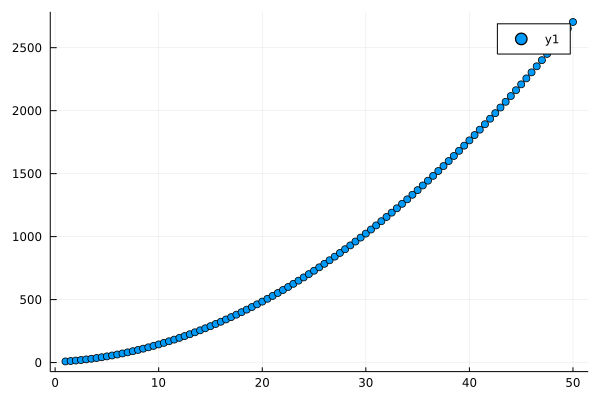

In [2]:
x = collect(1:0.5:50)
y = map(x->x^2+4x+4, x)
plot(x,y,seriestype = :scatter)

In [3]:
f(x,v1,w1,b1) = v1*x^2 + w1*x + b1
loss(y,t) = (y-t)^2/2

loss (generic function with 1 method)

The function f has three trainable parameters - w1, w2 and b1. The target we need to achieve is v1 = 1, w1 = 4 and b1 = 4. Let us first define the v1, w1 and b1 parameters randomly at first.

In [4]:
v = 1.5; w = 4.5; b = 3.5;
v,w,b

(1.5, 4.5, 3.5)

In [5]:
v = rand(); w = rand(); b = rand();
η = 1e-6
while true
    net_loss = 0
    grad_v = 0
    grad_w = 0
    grad_b = 0
    for i = 1:length(x)
        # loss calculation
        t = f(x[i], v, w, b)
        net_loss += loss(t, y[i])
        grad_v += (x[i])^2*(y[i]-t)
        grad_w += x[i]*(y[i]-t)
        grad_b += y[i]-t
#         w = w - η*grad_w
#         b = b - η*grad_b
    end
    # updation
    v = v + η*grad_v/length(x)
    w = w + η*grad_w/length(x)
    b = b + η*grad_b/length(x)
    net_loss = net_loss/length(x)
    println("Loss: ",net_loss)
    if net_loss < 0.0005
        break
    end
end

Loss: 555070.6866876064
Loss: 48808.52446959017
Loss: 4690.06538409952
Loss: 845.2983297308563
Loss: 510.1977729168402
Loss: 480.9484675718397
Loss: 478.35269304099074
Loss: 478.07965580688597
Loss: 478.0090394430974
Loss: 477.9560681527826
Loss: 477.90463957700103
Loss: 477.8533504689116
Loss: 477.8020785414845
Loss: 477.7508131374278
Loss: 477.699553327467
Loss: 477.6482990300847
Loss: 477.5970502376337
Loss: 477.5458069489077
Loss: 477.4945691632634
Loss: 477.4433368801067
Loss: 477.39211009884315
Loss: 477.34088881888334
Loss: 477.28967303963725
Loss: 477.2384627605137
Loss: 477.1872579809202
Loss: 477.1360587002697
Loss: 477.0848649179692
Loss: 477.0336766334273
Loss: 476.98249384605435
Loss: 476.93131655526213
Loss: 476.88014476045737
Loss: 476.8289784610538
Loss: 476.7778176564574
Loss: 476.7266623460796
Loss: 476.67551252933004
Loss: 476.62436820561766
Loss: 476.5732293743534
Loss: 476.5220960349497
Loss: 476.4709681868161
Loss: 476.41984582935976
Loss: 476.36872896199145
Loss:

Excessive output truncated after 524289 bytes.

Loss: 49.81625596886838
Loss: 49.81095244233192
Loss: 49.805649485339885
Loss: 49.80034709783018
Loss: 49.79504527974228
Loss: 49.789744031014195
Loss: 49.78444335158527
Loss: 49.77914324139492
Loss: 49.77384370038109
Loss: 49.76854472848311
Loss: 49.763246325639464
Loss: 49.75794849178965
Loss: 49.752651226872146
Loss: 49.74735453082621
Loss: 49.74205840359013
Loss: 49.736762845103755
Loss: 49.73146785530479
Loss: 49.72617343413336
Loss: 49.72087958152795
Loss: 49.715586297426974
Loss: 49.71029358177005
Loss: 49.705001434495394
Loss: 49.6997098555432
Loss: 49.69441884485146
Loss: 49.68912840235921
Loss: 49.683838528005786
Loss: 49.678549221730016
Loss: 49.673260483470955
Loss: 49.667972313167354
Loss: 49.662684710758526
Loss: 49.65739767618333
Loss: 49.65211120938095
Loss: 49.64682531028993
Loss: 49.641539978850176
Loss: 49.636255214999466
Loss: 49.63097101867801
Loss: 49.625687389825146
Loss: 49.62040432837778
Loss: 49.6151218342774
Loss: 49.609839907461385
Loss: 49.60455854787028
Lo

In [9]:
v,w,b

(0.9998668426673596, 4.008026536648499, 3.899233787279098)

### As expected v,w,b are approximately equal to assumed values

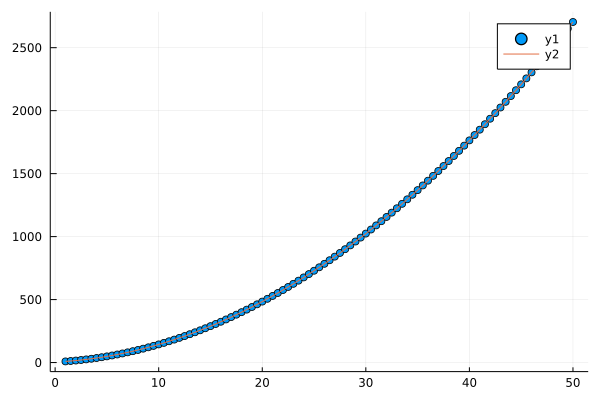

In [7]:
plot!(x,f.(x,v,w,b))